초기 세팅

In [ ]:
pip install haversine

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl         
import matplotlib.pyplot as plt 
import seaborn as sns
from haversine import haversine
# Some helper functions to make our plots cleaner with Plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_Boston = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/df_Boston.csv")
len(df_Boston)

3468

리뷰 수나 리뷰 Rating이 없는 데이터 삭제

In [ ]:
df_Boston = df_Boston[df_Boston.number_of_reviews.notnull()]
df_Boston = df_Boston[df_Boston.review_scores_rating.notnull()]
len(df_Boston.index)

2820

In [ ]:
df_Boston['number_of_reviews'].isnull().values.any()
df_Boston['review_scores_rating'].isnull().values.any()

False

바운더리 설정

In [ ]:
def haversine_trial_2(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [ ]:
df_Boston['Distance_to_South'] = haversine_trial_2(df_Boston['latitude'],df_Boston['longitude'],42.352035,-71.055182)
df_Boston['Distance_to_Fenway'] = haversine_trial_2(df_Boston['latitude'],df_Boston['longitude'],42.346268,-71.095764)

Performace Score 계산

In [ ]:
df_Boston['Performance_Score'] = (df_Boston['number_of_reviews']*df_Boston['review_scores_rating'])/100

Performance Score 분포 계산 & 시각화

In [ ]:
df_Boston['Performance_Score'].describe(percentiles=[0.25,0.75])
#707개 각각

count    2820.000000
mean       29.646177
std        45.131118
min         0.200000
25%         3.400000
50%        11.420000
75%        36.295000
max       351.540000
Name: Performance_Score, dtype: float64

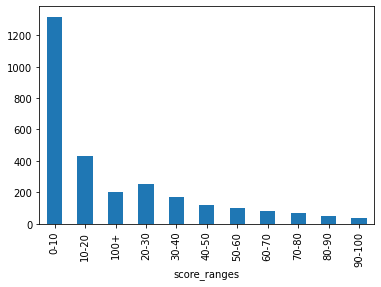

In [ ]:
def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value

df_Boston['score_ranges'] = df_Boston['Performance_Score'].apply(rangeScore)
df_by_group2 = df_Boston.groupby(['score_ranges']).size().plot(kind = "bar")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



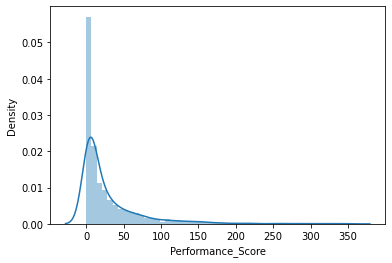

In [ ]:
plt.figure()
sns.distplot(df_Boston['Performance_Score'])

Performance 결정하는 변수들

In [ ]:
# 제외할 변수들
df_Boston.drop(['log_price','property_type','room_type','accommodates','bathrooms','bed_type','zipcode','bedrooms','beds'], axis=1, inplace=True)
df_Boston

,Unnamed: 0,id,amenities,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,Distance_to_South,Distance_to_Fenway,Performance_Score,score_ranges
0,17,14648556,"{Internet,""Wireless Internet"",""Air conditionin...",strict,True,Boston,This is a nice duplex in a good location.Recen...,2016-07-16,t,t,100%,f,42.339194,-71.049672,"Comfy room (C) near T, convention center, down...",South Boston,12,88.0,https://a0.muscache.com/im/pictures/176088bb-3...,1.50,3.87,10.56,10-20
1,39,4680055,"{TV,Internet,""Wireless Internet"",""Air conditio...",strict,True,Boston,Tourists/Conference-goers great choice! Privat...,2020-03-16,t,t,100%,t,42.330628,-71.053148,Private Bedroom Close To Downtown/Subway Red line,South Boston,40,96.0,https://a0.muscache.com/im/pictures/aad0eaa7-a...,2.39,3.91,38.40,30-40
2,60,4274462,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",strict,True,Boston,"An Entire 2 bedroom, 600sqft, apartment w/ 4 t...",2014-09-17,t,t,100%,f,42.336007,-71.052918,**NEW*Downtown/Convention/Subway/Beach C130,South Boston,5,100.0,https://a0.muscache.com/im/pictures/3d35ea0b-e...,1.79,3.70,5.00,0-10
4,134,16253186,"{TV,""Wireless Internet"",Kitchen,""Family/kid fr...",flexible,False,Boston,Nicely decorated comfortable 1 bedroom in very...,2021-05-17,t,f,NaN,t,42.357198,-71.071588,Clean upscale apt and location,Beacon Hill,2,80.0,https://a0.muscache.com/im/pictures/9bf5ae4c-f...,1.47,2.33,1.60,0-10
5,150,14916417,"{""Wireless Internet"",""Air conditioning"",Kitche...",flexible,False,Boston,1br in 2bhk available just 20 minutes walk fro...,2001-09-17,t,f,100%,f,42.332122,-71.112803,1br in 2bhk furnished,Mission Hill,1,100.0,https://a0.muscache.com/im/pictures/fa57413a-5...,5.23,2.11,1.00,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,74021,12627709,"{TV,Internet,""Wireless Internet"",""Air conditio...",moderate,True,Boston,Sun filled city dwelling with 2 great bedrooms...,2028-01-17,t,t,100%,t,42.340983,-71.144400,Industrial dwelling 2BD w/pvt parking,Allston-Brighton,25,95.0,https://a0.muscache.com/im/pictures/78679bb4-6...,7.43,4.04,23.75,20-30
3464,74042,16274884,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,True,Boston,Welcome to the 'ur-burbs'~~! This Single Fami...,2006-07-16,t,t,100%,f,42.280757,-71.153214,The 1880 House: Historic Single Family Victorian!,West Roxbury,7,100.0,https://a0.muscache.com/im/pictures/4df663bd-f...,11.30,8.68,7.00,0-10
3465,74068,14043110,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",flexible,False,Boston,Just a 6 or 7 minute walk from the Stonybrook ...,2028-09-15,t,f,NaN,f,42.319239,-71.106240,Beautiful modern condo near T,Jamaica Plain,5,100.0,https://a0.muscache.com/im/pictures/105313307/...,5.56,3.13,5.00,0-10
3466,74076,1373456,"{""Wireless Internet"",Kitchen,""Pets allowed"",El...",strict,True,Boston,"The apartment is much more so a *home*, than i...",2015-09-16,t,t,93%,f,42.344962,-71.096733,"Fenway appartment, clean & cozy",Fenway/Kenmore,12,98.0,https://a0.muscache.com/im/pictures/50bec3ec-6...,3.50,0.17,11.76,10-20


**South Station** 반경 2km 분석

In [ ]:
df_Boston_South = df_Boston[df_Boston.Distance_to_South <= 2]
len(df_Boston_South)

827

In [ ]:
# Amenities
df_Boston_South['amenities_count'] = df_Boston_South['amenities'].str.split(',').str.len() #개수에 차이가 있는지?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Percentiles 바운더리 찾기
df_Boston_South['Performance_Score'].describe(percentiles=[0.25,0.75])

count    827.00000
mean      29.87948
std       44.15080
min        0.20000
25%        3.80000
50%       11.83000
75%       37.86500
max      351.54000
Name: Performance_Score, dtype: float64

In [ ]:
df_Boston_South_Good = df_Boston_South[df_Boston_South.Performance_Score >= 37.865] #207
df_Boston_South_Bad = df_Boston_South[df_Boston_South.Performance_Score <= 3.80] #211

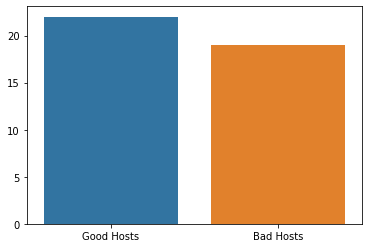

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [22.0, 19.0]}


In [ ]:
# Amenities # 개수의 차이가 있을까?
# print(df_Boston_South_Good['amenities_count'].describe(percentiles=[0.25,0.75]))
# print(df_Boston_South_Bad['amenities_count'].describe(percentiles=[0.25,0.75]))

amenities_good = df_Boston_South_Good['amenities_count'].median()
amenities_bad = df_Boston_South_Bad['amenities_count'].median()
amenities_count = {'x':['Good Hosts','Bad Hosts'],'y':[amenities_good,amenities_bad]}

#시각화
amenities_bar = sns.barplot(x='x', y='y',data=amenities_count)
plt.show()

#데이터
print(amenities_count)

In [ ]:
# Cancellation Policy
# Policy에 따른 다른 것

# cancel_good = len(df_Boston_South_Good[df_Boston_South_Good.cancellation_policy==True].count())
# cancel_bad = len(df_Boston_South_Bad[df_Boston_South_Bad.cancellation_policy==True].count())
# cancel_count = {'x':['Good Hosts','Bad Hosts'],'y':[cancel_good,cancel_bad]}

# #시각화
# cancel_bar = sns.barplot(x='x', y='y',data=cancel_count)
# plt.show()

# #데이터
# print(cancel_good)
# print(cancel_bad)

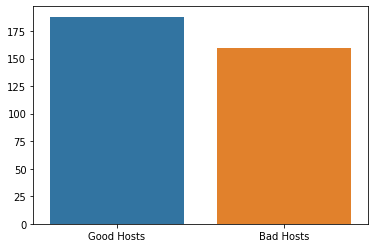

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [188, 160]}


In [ ]:
# Cleaning Fee
clean_good = df_Boston_South_Good[df_Boston_South_Good.cleaning_fee==True].count().cancellation_policy
clean_bad = df_Boston_South_Bad[df_Boston_South_Bad.cleaning_fee==True].count().cancellation_policy
clean_count = {'x':['Good Hosts','Bad Hosts'],'y':[clean_good,clean_bad]}

# #시각화
clean_bar = sns.barplot(x='x', y='y',data=clean_count)
plt.show()

# # 데이터
print(clean_count)

In [ ]:
# Description

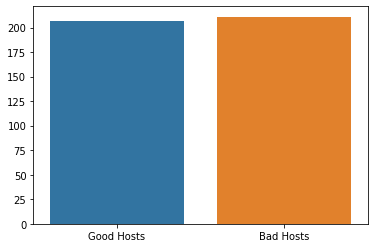

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [207, 211]}


In [ ]:
# Host Has Profile Pic
hostpic_good = df_Boston_South_Good[df_Boston_South_Good.host_has_profile_pic=='t'].count().host_has_profile_pic
hostpic_bad = df_Boston_South_Bad[df_Boston_South_Bad.host_has_profile_pic=='t'].count().host_has_profile_pic
hostpic_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostpic_good,hostpic_bad]}

# #시각화
hostpic_bar = sns.barplot(x='x', y='y',data=hostpic_count)
plt.show()

# # 데이터
print(hostpic_count)

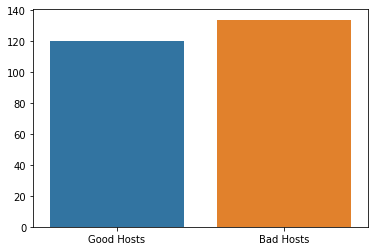

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [120, 134]}


In [ ]:
# Host Verified
hostveri_good = df_Boston_South_Good[df_Boston_South_Good.host_identity_verified=='t'].count().host_identity_verified
hostveri_bad = df_Boston_South_Bad[df_Boston_South_Bad.host_identity_verified=='t'].count().host_identity_verified
hostveri_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostveri_good,hostveri_bad]}

# #시각화
hostveri_bar = sns.barplot(x='x', y='y',data=hostveri_count)
plt.show()

# # 데이터
print(hostveri_count)

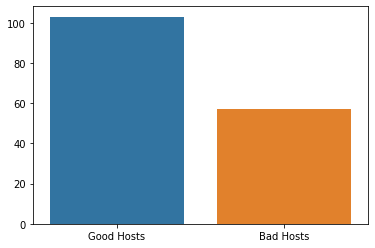

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [103, 57]}


In [ ]:
# Instant Bookable
hostbook_good = df_Boston_South_Good[df_Boston_South_Good.instant_bookable=='t'].count().instant_bookable
hostbook_bad = df_Boston_South_Bad[df_Boston_South_Bad.instant_bookable=='t'].count().instant_bookable
hostbook_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostbook_good,hostbook_bad]}

# #시각화
hostbook_bar = sns.barplot(x='x', y='y',data=hostbook_count)
plt.show()

# # 데이터
print(hostbook_count)

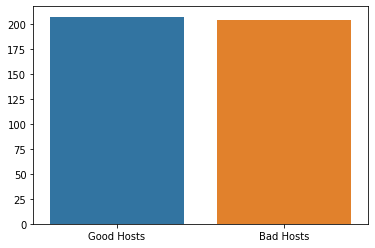

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [207, 204]}


In [ ]:
# Thumbnail
thumb_good = df_Boston_South_Good[df_Boston_South_Good.thumbnail_url!=None].count().thumbnail_url
thumb_bad = df_Boston_South_Bad[df_Boston_South_Bad.instant_bookable!=None].count().thumbnail_url
thumb_count = {'x':['Good Hosts','Bad Hosts'],'y':[thumb_good,thumb_bad]}

# #시각화
thumb_bar = sns.barplot(x='x', y='y',data=thumb_count)
plt.show()

# # 데이터
print(thumb_count)

In [ ]:
# Host Response Rate
hostresp_good = df_Boston_South_Good['host_response_rate'].mean()
hostresp_bad = df_Boston_South_Bad['host_response_rate'].mean()
hostresp_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostresp_good,hostresp_bad]}
print(hostresp_good)

# #시각화
#hostresp_bar = sns.barplot(x='x', y='y',data=hostresp_count)
plt.show()

# # 데이터
print(hostresp_count)

TypeError: ignored

In [ ]:
# Name

In [ ]:
# Neighbourhood